# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [20]:
# Load and Read CSV Fils

# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load 
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [21]:
# Combine the data into a single dataset (Merge dataframe)
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [22]:
#  1. Get the total rides for each city type
count_rides_by_type =  pyber_data_df.groupby(["type"]).count()["ride_id"]
# count_rides_by_type

In [23]:
# 2. Get the total drivers for each city type
sum_drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
# sum_drivers_by_city_type

In [24]:
#  3. Get the total amount of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
# sum_fares_by_type

In [25]:
#  4. Get the average fare per ride for each city type. 
average_fare_by_type =  pyber_data_df.groupby(["type"]).mean()["fare"]
# average_fare_by_type

In [26]:
# 5. Get the average fare per driver for each city type. 

average_fare_per_driver_by_type = sum_fares_by_type / sum_drivers_by_city_type
# average_fare_per_driver_by_type

In [27]:
#  6. Create a PyBer summary DataFrame. 

# Assemble into a new dataframe
pyber_summary_df = pd.DataFrame ({
    "Total Rides" : count_rides_by_type,
          "Total Drivers": sum_drivers_by_city_type,
          "Total Fares": sum_fares_by_type,
          "Average Fare per Ride": average_fare_by_type,
          "Average Fare per Driver": average_fare_per_driver_by_type})

# pyber_summary_df

In [28]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
# Check the data types
pyber_summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [29]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [30]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [31]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

# In Step 1, create a new DataFrame with multiple indices using the groupby() function on the "type" and "date" columns of the
# columns of the pyber_data_df DataFrame, then apply the sum() method on the "fare" column to show the total fare amount for each date.
total_fares_each_week_by_city = pyber_data_df.groupby(["type", "date"]).sum()['fare']
total_fares_each_week_by_city.head()


type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
Name: fare, dtype: float64

In [32]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

# Reset the index of the Pandas Series to convert to a DataFrame.

total_fares_each_week_by_city = total_fares_each_week_by_city.reset_index()
total_fares_each_week_by_city.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [33]:
# 4. Create a pivot table with the 'date' as the index, 
# the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
# In Step 3, use the pivot() function to convert the DataFrame 
# from the previous step so that the index is the "date," 
# each column is a city "type," and the values are the "fare."

total_fares_each_week_by_city_pivot = total_fares_each_week_by_city.pivot(index="date", columns="type", values="fare")
total_fares_each_week_by_city_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [34]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
total_fares_jan_april = total_fares_each_week_by_city_pivot.loc['2019-01-01':'2019-04-28']
total_fares_jan_april.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [35]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
total_fares_jan_april.index = pd.to_datetime(total_fares_jan_april.index)
total_fares_jan_april.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [36]:
# 7. Check that the datatype for the index is datetime using df.info()
total_fares_jan_april.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [37]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
# In Step 7, create a new DataFrame by applying the resample() function to the DataFrame you modified in Step 5. 
# Resample the data in weekly bins, then apply the sum() method to get the total fares for each week.
weekly_fares_df = total_fares_jan_april.resample('W').sum()
weekly_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


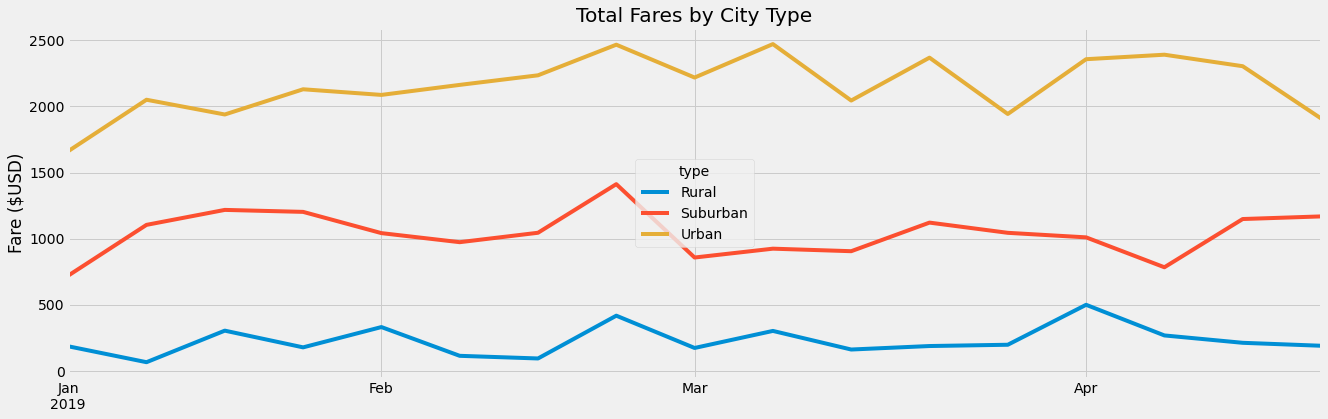

In [38]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Finally, in Step 8, graph the resampled DataFrame from Step 7 using the object-oriented interface method 
# and the df.plot() method, as well as the Matplotlib "fivethirtyeight" graph style code snippet provided in the starter code. 
# Annotate the y-axis label and the title, then use the appropriate code to save the figure as PyBer_fare_summary.png in your "analysis" folder.

# Import the style from Matplotlib.
from matplotlib import style


# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Plot the resampled DataFrame.
weekly_fares = weekly_fares_df.plot(figsize = (20,6))
# Add a title 
weekly_fares.set_title("Total Fares by City Type")
#  Add a x- and y-axis label.
weekly_fares.set_ylabel("Fare ($USD)")
weekly_fares.set_xlabel("")
plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()

